In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import plotly.express as px
from collections import defaultdict
from copy import deepcopy
from itertools import chain
import random
import time
import itertools
import math
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
count=input('何番目のデータまで読み込み?(最大は10000)')
def search_and_load_csv(folder_path, keyword):

    all_dataframes = []  # ロードされたすべてのDataFramesを保存する
    
    # フォルダとサブフォルダ内のファイルを反復処理する
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # ファイルがCSVファイルで、ファイル名にキーワードが含まれているかチェックする
            if keyword in file and file.endswith('.csv'):
                file_path = os.path.join(root, file)
                try:
                    # CSVファイルをDataFrameに読み込む
                    df = pd.read_csv(file_path)
                    all_dataframes.append(df)
                    print(f"ファイル読み込み成功: {file_path}")
                except Exception as e:
                    print(f"ファイル読み込めない {file_path}: {e}")

    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        return combined_df
    else:
        print("該当するCSVファイルが見つかりません")
        return pd.DataFrame()
    
for i in np.arange(1,int(count)+1):# 使用例
    folder = "D:\\pysrc\\wang_data\\jobset\\double normal\\j1[5,1],j2[8,1]\\p1[5,1],p2[8,1]\\machine[4]\\t1[10,1],t2[15,1]\\seed[3]" 
    keyword = ","+str(i)+"gene"  # キーワードを変わる
    globals()[f"df{i}"] = search_and_load_csv(folder, keyword)

# 打印结果
#if not df_i.empty:
    #print("合并后的DataFrame:")
    #print(df_i.head())
#else:
    #print("未加载任何数据。")

ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[7]r[6]c,1gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[6]r[5]c,2gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[5]r[5]c,3gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[5]r[6]c,4gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[7]r[4]c,5gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[4]r[5]c,6gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[4]r[7]c,7gene.csv
ファイル読み込み成功: D:\pysrc

In [4]:
dfs = {}
T_genes = {}
MS_genes = {}

for i in np.arange(1,int(count)+1):
    df= globals()[f"df{i}"]
    T_gene = pd.DataFrame(index=df.index, columns=df.columns)
    MS_gene = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        for idx in df.index:
            value = df.loc[idx, col]
            if value.startswith('(') and value.endswith(')'):  # 判断元素是否为元组字符串
                 # 使用 ast.literal_eval 安全地将字符串转换为元组
                value_tuple = ast.literal_eval(value)
                T_gene.loc[idx, col] = float(value_tuple[1]) 
                MS_gene.loc[idx, col] = float(value_tuple[0]) 
            else:
                try:
                    # 如果是单一数字（字符串形式），尝试转换为浮动数值
                    T_gene.loc[idx, col] = float(value)
                    MS_gene.loc[idx, col] = float(value)
                except ValueError:
                    # 如果不能转换为数字，则保留原值
                    T_gene.loc[idx, col] = value
                    MS_gene.loc[idx, col] = value
    
    T_gene = T_gene.to_numpy()  
    globals()[f"T_gene{i}"] = T_gene[:,1:].astype(int)
    MS_gene = MS_gene.to_numpy() 
    globals()[f"MS_gene{i}"] = MS_gene[:,1:].astype(int)

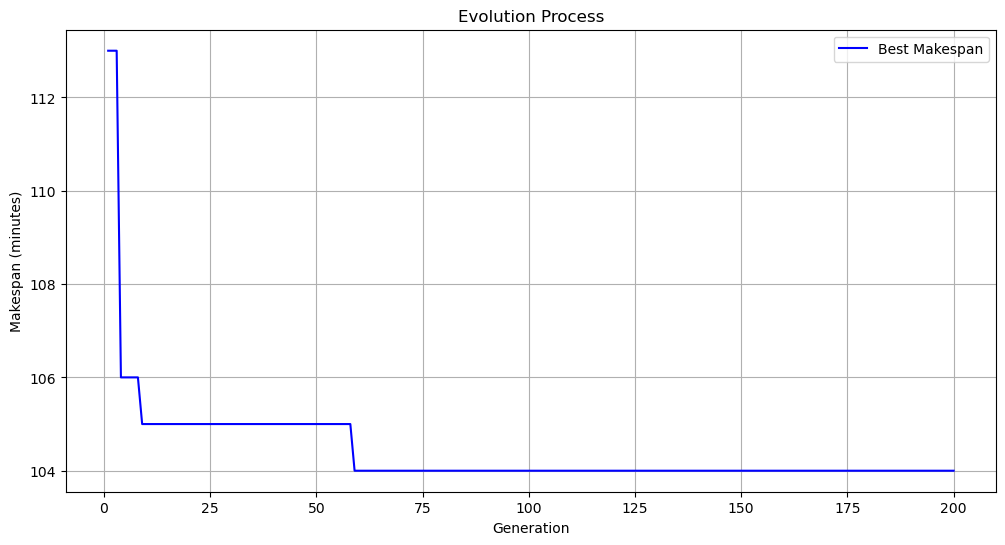

第 5 回的结果

最优完成时间: 104 分钟
染色体验证结果: True


C:\Users\G15\AppData\Local\Temp\ipykernel_11512\1987689465.py:270: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(jobs))


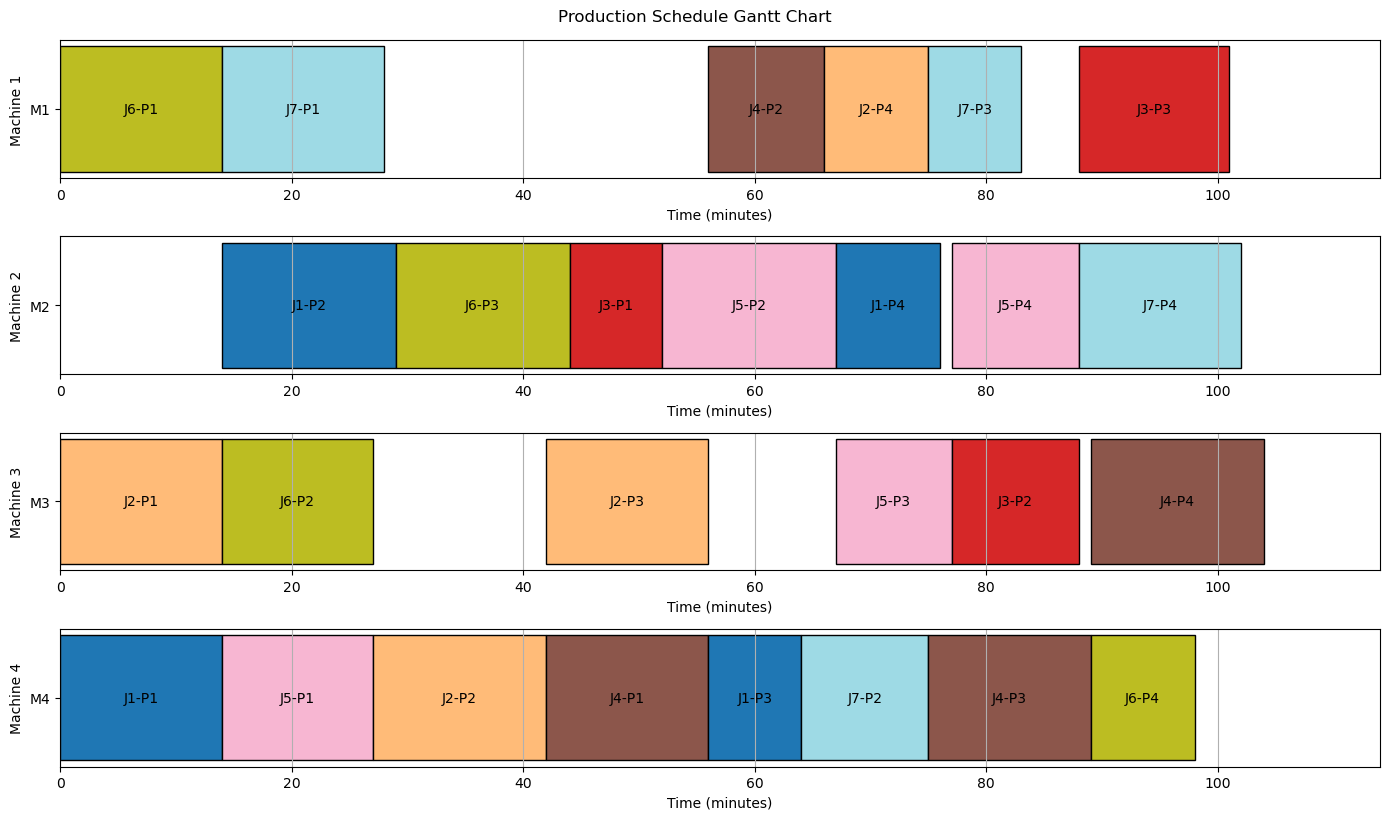

In [5]:
ID=input('何回目のジョブデータを見たい?')
time_matrix = globals()[f"T_gene{ID}"]
machine_matrix = globals()[f"MS_gene{ID}"]
time_matrix[time_matrix == 0] = -1
machine_matrix[machine_matrix == 0] = -1

# 预处理生成工序列表
jobs = []
for job_id in range(len(time_matrix)):
    steps = []
    for step in range(len(time_matrix[job_id])):
        if time_matrix[job_id][step] == -1:
            break
        steps.append({
            'machine': machine_matrix[job_id][step] - 1,  # 转为0-based
            'duration': time_matrix[job_id][step]
        })
    jobs.append(steps)

# 遗传算法参数
POP_SIZE = 100
MAX_GEN = 200
CX_PROB = 0.8
MUT_PROB = 0.1
ELITE_SIZE = 2
TOURNAMENT_SIZE = 5

class Chromosome:
    def __init__(self, genes):
        self.genes = genes  # 格式: [(job_id, step_id), ...]
        self._makespan = None
    
    def validate(self):
        """验证工序顺序正确性"""
        job_progress = defaultdict(int)
        for gene in self.genes:
            job_id, step_id = gene
            if step_id != job_progress[job_id]:
                return False
            job_progress[job_id] += 1
        # 检查是否包含所有必需基因
        required = {(j, s) for j in range(len(jobs)) for s in range(len(jobs[j]))}
        return set(self.genes) == required
    
    def repair(self):
        """染色体修复机制"""
        # 补全缺失基因并去除重复
        present_genes = set(self.genes)
        required_genes = {(j, s) for j in range(len(jobs)) for s in range(len(jobs[j]))}
        missing = list(required_genes - present_genes)
        duplicates = list(present_genes - required_genes)
        
        # 替换重复基因
        new_genes = self.genes.copy()
        while duplicates and missing:
            dup_idx = next(i for i,g in enumerate(new_genes) if g in duplicates)
            new_genes[dup_idx] = missing.pop()
            duplicates.remove(new_genes[dup_idx])
        
        # 按作业顺序重新排序
        sorted_genes = []
        job_progress = defaultdict(int)
        remaining = new_genes.copy()
        while remaining:
            available = [g for g in remaining if g[1] == job_progress[g[0]]]
            if not available:  # 处理意外情况
                available = remaining
            selected = random.choice(available)
            sorted_genes.append(selected)
            job_progress[selected[0]] += 1
            remaining.remove(selected)
        
        self.genes = sorted_genes
        return self
    
    def makespan(self):
        """计算总完成时间（带缓存）"""
        if self._makespan is None:
            self._makespan = self._calculate_makespan()
        return self._makespan
    
    def _calculate_makespan(self):
        machine_times = defaultdict(int)
        job_times = defaultdict(int)
        
        for gene in self.genes:
            job_id, step_id = gene
            machine = jobs[job_id][step_id]['machine']
            duration = jobs[job_id][step_id]['duration']
            
            start = max(job_times[job_id], machine_times[machine])
            end = start + duration
            
            job_times[job_id] = end
            machine_times[machine] = end
        
        return max(job_times.values(), default=0)

def initialize_population():
    """初始化合法种群"""
    population = []
    for _ in range(POP_SIZE):
        genes = []
        job_progress = defaultdict(int)
        remaining = sum(len(job) for job in jobs)
        
        while remaining > 0:
            available_jobs = [j for j in range(len(jobs)) 
                            if job_progress[j] < len(jobs[j])]
            selected_job = random.choice(available_jobs)
            step = job_progress[selected_job]
            genes.append((selected_job, step))
            job_progress[selected_job] += 1
            remaining -= 1
            
        population.append(Chromosome(genes))
    return population

def strict_precedence_crossover(parent1, parent2):
    """严格顺序保留交叉"""
    # 创建工序池
    pool = defaultdict(list)
    for gene in parent1.genes + parent2.genes:
        pool[gene[0]].append(gene)
    
    # 合并工序链
    child_genes = []
    job_progress = defaultdict(int)
    
    while len(child_genes) < sum(len(job) for job in jobs):
        available_jobs = [j for j in range(len(jobs)) 
                        if job_progress[j] < len(jobs[j])]
        selected_job = random.choice(available_jobs)
        
        # 从两个父代中选择下一步工序
        candidates = [g for g in pool[selected_job] 
                     if g[1] == job_progress[selected_job]]
        if candidates:
            selected_gene = random.choice(candidates)
            child_genes.append(selected_gene)
            pool[selected_job].remove(selected_gene)
            job_progress[selected_job] += 1
    
    return Chromosome(child_genes).repair()

def enhanced_safe_mutation(chromosome):
    """增强安全变异"""
    genes = chromosome.genes.copy()
    
    # 寻找可交换位置（不同作业的非连续工序）
    swap_candidates = []
    for i in range(len(genes)):
        current_job, current_step = genes[i]
        # 检查是否是该作业的最后一步
        if current_step == len(jobs[current_job]) - 1:
            continue
        # 检查是否被相同作业的工序包围
        prev_same = (i > 0 and genes[i-1][0] == current_job)
        next_same = (i < len(genes)-1 and genes[i+1][0] == current_job)
        if not prev_same and not next_same:
            swap_candidates.append(i)
    
    if len(swap_candidates) >= 2:
        idx1, idx2 = random.sample(swap_candidates, 2)
        if genes[idx1][0] != genes[idx2][0]:
            genes[idx1], genes[idx2] = genes[idx2], genes[idx1]
    
    return Chromosome(genes).repair()

def tournament_selection(population):
    """锦标赛选择"""
    selected = []
    for _ in range(2):
        contestants = random.sample(population, TOURNAMENT_SIZE)
        contestants.sort(key=lambda x: x.makespan())
        selected.append(deepcopy(contestants[0]))
    return selected

def genetic_algorithm():
    population = initialize_population()
    best_chrom = min(population, key=lambda x: x.makespan())
    history = []
    
    for gen in range(MAX_GEN):
        # 种群修复
        population = [chrom.repair() for chrom in population]
        
        # 评估适应度
        fitnesses = []
        for chrom in population:
            if not chrom.validate():
                chrom._makespan = float('inf')
            fitnesses.append(chrom.makespan())
        
        # 记录历史数据
        current_best = min(fitnesses)
        history.append({
            'gen': gen+1,
            'best': current_best,
            'avg': np.mean(fitnesses),
            'worst': max(fitnesses)
        })
        
        # 更新全局最优
        if current_best < best_chrom.makespan():
            best_chrom = deepcopy(population[fitnesses.index(current_best)])
        
        # 精英选择
        elite = sorted(population, key=lambda x: x.makespan())[:ELITE_SIZE]
        
        # 生成新一代
        new_population = elite.copy()
        while len(new_population) < POP_SIZE:
            # 选择父代
            parent1, parent2 = tournament_selection(population)
            
            # 交叉
            if random.random() < CX_PROB:
                child = strict_precedence_crossover(parent1, parent2)
            else:
                child = random.choice([parent1, parent2])
            
            # 变异
            child = enhanced_safe_mutation(child)
            
            new_population.append(child)
        
        population = new_population[:POP_SIZE]
        
        #print(f"Generation {gen+1}: Best={current_best}")
    
    # 绘制进化曲线
    plt.figure(figsize=(12,6))
    gens = [h['gen'] for h in history]
    plt.plot(gens, [h['best'] for h in history], 'b-', label='Best Makespan')
    #plt.plot(gens, [h['avg'] for h in history], 'r--', label='Average Makespan')
    plt.xlabel('Generation')
    plt.ylabel('Makespan (minutes)')
    plt.title('Evolution Process')
    plt.legend()
    plt.grid()
    plt.show()
    
    return best_chrom

def plot_gantt(chromosome):
    """绘制甘特图"""
    schedule = defaultdict(list)
    machine_times = defaultdict(int)
    job_times = defaultdict(int)
    
    for gene in chromosome.genes:
        job_id, step_id = gene
        machine = jobs[job_id][step_id]['machine']
        duration = jobs[job_id][step_id]['duration']
        start = max(job_times[job_id], machine_times[machine])
        end = start + duration
        
        schedule[machine].append({
            'job': job_id+1,
            'step': step_id+1,
            'start': start,
            'end': end
        })
        
        job_times[job_id] = end
        machine_times[machine] = end
    
    plt.figure(figsize=(14, 8))
    colors = plt.cm.get_cmap('tab20', len(jobs))
    
    for idx, machine in enumerate(sorted(schedule.keys())):
        plt.subplot(len(schedule), 1, idx+1)
        tasks = sorted(schedule[machine], key=lambda x: x['start'])
        
        for task in tasks:
            plt.barh(
                y=f'M{machine+1}',
                width=task['end']-task['start'],
                left=task['start'],
                color=colors(task['job']-1),
                edgecolor='black'
            )
            plt.text(
                x=(task['start'] + task['end'])/2,
                y=f'M{machine+1}',
                s=f'J{task["job"]}-P{task["step"]}',
                va='center',
                ha='center'
            )
        
        plt.xlabel('Time (minutes)')
        plt.ylabel(f'Machine {machine+1}')
        plt.xlim(0, chromosome.makespan() + 10)
        plt.grid(axis='x')
    
    plt.tight_layout()
    plt.suptitle('Production Schedule Gantt Chart', y=1.02)
    plt.show()

# 运行算法
best_solution = genetic_algorithm()

# 输出结果
print('第',ID,'回的结果')
print(f"\n最优完成时间: {best_solution.makespan()} 分钟")
print("染色体验证结果:", best_solution.validate())
plot_gantt(best_solution)

In [6]:
print(time_matrix)
print(machine_matrix)

[[14 15  8  9]
 [14 15 14  9]
 [ 8 11 13 -1]
 [14 10 14 15]
 [13 15 10 11]
 [14 13 15  9]
 [14 11  8 14]]
[[ 4  2  4  2]
 [ 3  4  3  1]
 [ 2  3  1 -1]
 [ 4  1  4  3]
 [ 4  2  3  2]
 [ 1  3  2  4]
 [ 1  4  1  2]]


In [7]:
# AGV参数
AGV_COUNT = 2
TRANSPORT_TIME = {
    ('L/U', 'M1'): 3, ('L/U', 'M2'): 3, ('L/U', 'M3'): 3, ('L/U', 'M4'): 3,
    ('M1', 'M2'): 2, ('M1', 'M3'): 3, ('M1', 'M4'): 4,
    ('M2', 'M3'): 2, ('M2', 'M4'): 3,
    ('M3', 'M4'): 2
}
for (a,b), t in list(TRANSPORT_TIME.items()):
    TRANSPORT_TIME[(b,a)] = t

Gen 1: Best=300.0
Gen 2: Best=275.0
Gen 3: Best=275.0
Gen 4: Best=275.0
Gen 5: Best=261.0
Gen 6: Best=231.0
Gen 7: Best=231.0
Gen 8: Best=231.0
Gen 9: Best=231.0
Gen 10: Best=231.0
Gen 11: Best=231.0
交叉操作补全3个基因
交叉操作补全1个基因
Gen 12: Best=226.0
Gen 13: Best=226.0
Gen 14: Best=226.0
Gen 15: Best=223.0
Gen 16: Best=223.0
Gen 17: Best=219.0
Gen 18: Best=219.0
Gen 19: Best=219.0
Gen 20: Best=212.0
Gen 21: Best=212.0
Gen 22: Best=212.0
Gen 23: Best=212.0
Gen 24: Best=212.0
Gen 25: Best=212.0
Gen 26: Best=212.0
Gen 27: Best=212.0
Gen 28: Best=212.0
Gen 29: Best=212.0
Gen 30: Best=212.0
Gen 31: Best=212.0
Gen 32: Best=210.0
Gen 33: Best=210.0
Gen 34: Best=210.0
Gen 35: Best=210.0
交叉操作补全2个基因
Gen 36: Best=210.0
Gen 37: Best=210.0
Gen 38: Best=210.0
Gen 39: Best=210.0
交叉操作补全2个基因
交叉操作补全2个基因
Gen 40: Best=210.0
交叉操作补全2个基因
交叉操作补全3个基因
Gen 41: Best=210.0
Gen 42: Best=210.0
Gen 43: Best=204.0
Gen 44: Best=204.0
Gen 45: Best=204.0
Gen 46: Best=204.0
Gen 47: Best=204.0
交叉操作补全3个基因
Gen 48: Best=204.0
Gen 49: B

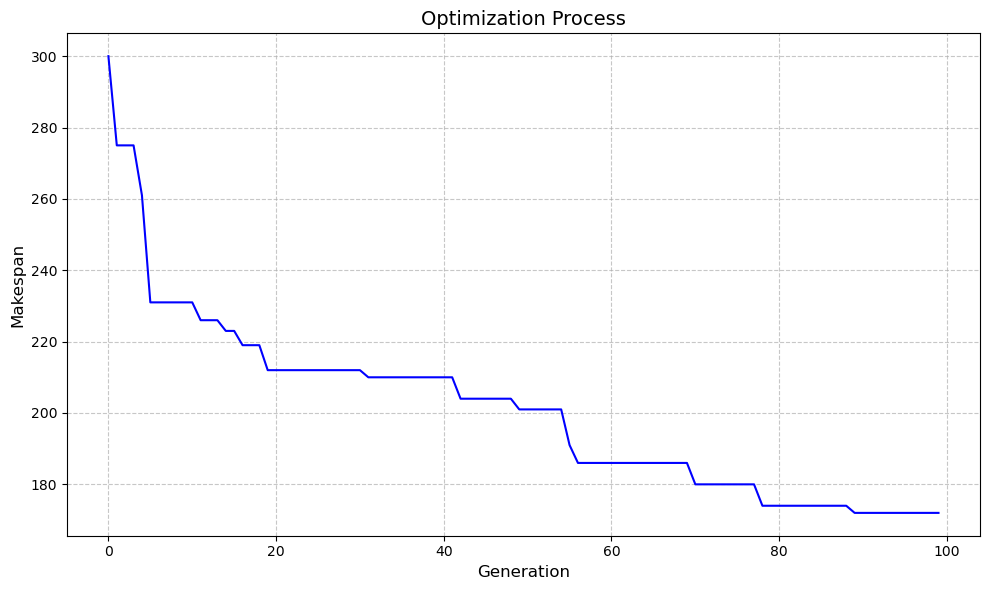

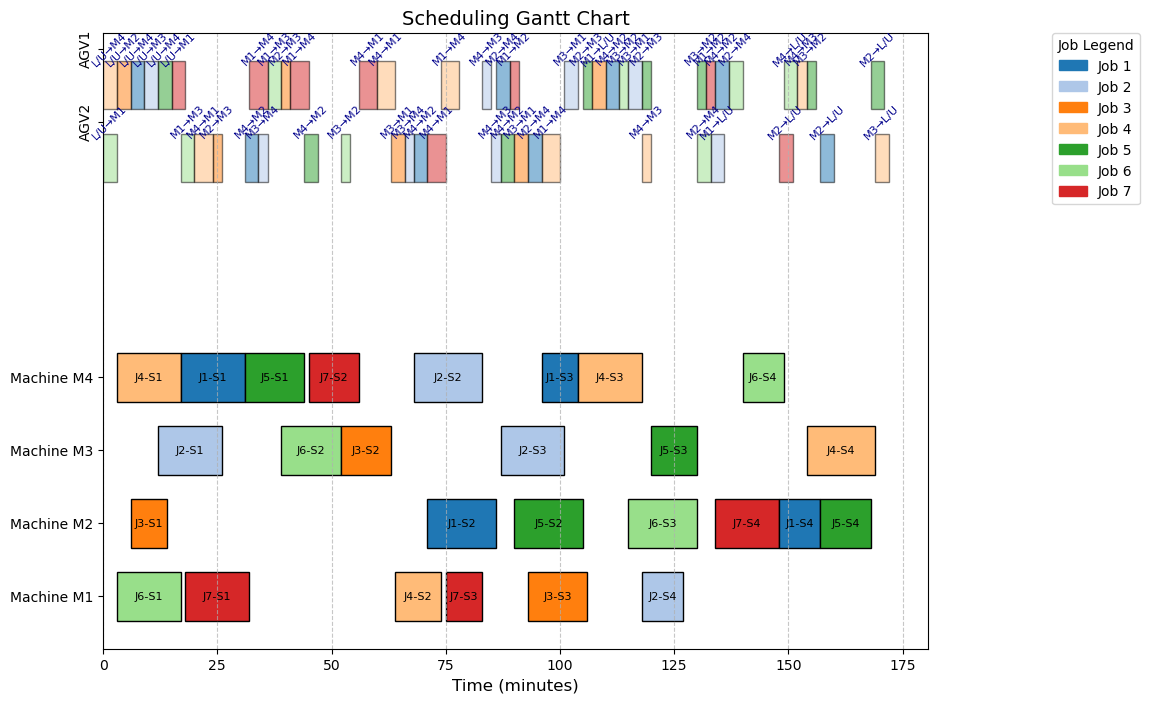

In [12]:
class DynamicJSSPSolver:
    def __init__(self, transport_time, agv_count=2):
        """
        参数说明：
        transport_time: 固定运输时间字典，格式 {(from, to): time}
        agv_count: AGV数量
        """
        self.transport_time = self._symmetrize_transport(transport_time)
        self.agv_count = agv_count
        self.jobs = []
    
    def _symmetrize_transport(self, transport_dict):
        """对称化运输时间"""
        symmetric = transport_dict.copy()
        for (a, b), t in transport_dict.items():
            symmetric[(b, a)] = t
        return symmetric
    
    def update_production_data(self, time_matrix, machine_matrix):
        """动态更新生产数据"""
        self.jobs = self._preprocess_data(time_matrix, machine_matrix)
    
    def _preprocess_data(self, time_matrix, machine_matrix):
        """动态处理输入矩阵"""
        jobs = []
        for job_idx in range(len(time_matrix)):
            steps = []
            for step_idx in range(len(time_matrix[job_idx])):
                duration = time_matrix[job_idx][step_idx]
                machine = machine_matrix[job_idx][step_idx]
                
                if duration == -1 or machine == -1:
                    break
                
                steps.append({
                    'machine': machine - 1,  # 转为0-based
                    'duration': duration,
                    'transport': []
                })
            jobs.append(steps)
        
        # 添加运输任务
        for job in jobs:
            prev_loc = 'L/U'
            for i, step in enumerate(job):
                machine = f'M{step["machine"]+1}'
                
                # 前运输
                step['transport'].append({
                    'from': prev_loc,
                    'to': machine,
                    'time': self.transport_time.get((prev_loc, machine), 0)
                })
                
                # 后运输
                if i == len(job)-1:
                    step['transport'].append({
                        'from': machine,
                        'to': 'L/U',
                        'time': self.transport_time.get((machine, 'L/U'), 0)
                    })
                else:
                    next_machine = f'M{job[i+1]["machine"]+1}'
                    step['transport'].append({
                        'from': machine,
                        'to': next_machine,
                        'time': self.transport_time.get((machine, next_machine), 0)
                    })
                prev_loc = machine
        return jobs
    
    class ScheduleGene:
        def __init__(self, job_id, step_id, agv_assign):
            self.job_id = job_id
            self.step_id = step_id
            self.agv_assign = agv_assign  # [前运输AGV, 后运输AGV]
    
    class Chromosome:
        def __init__(self, genes, agv_count, jobs):
            self.genes = genes
            self.agv_count = agv_count  # 显式存储AGV数量
            self.jobs = jobs            # 存储作业数据引用
            self._makespan = None
            self._schedule = {'machines': defaultdict(list), 'agvs': defaultdict(list)}
        
        def decode(self):
            """动态解码方法"""
            self._schedule['machines'].clear()
            self._schedule['agvs'].clear()
            
            machine_times = defaultdict(float)
            agv_times = [0.0] * self.agv_count  # 使用正确参数
            job_progress = defaultdict(float)
            
            for gene in self.genes:
                job_id = gene.job_id
                step_id = gene.step_id
                step = self.jobs[job_id][step_id]
                
                # ===== 前运输 =====
                agv_pre = gene.agv_assign[0]
                pre_trans = step['transport'][0]
                start_pre = max(
                    job_progress.get((job_id, step_id-1), 0.0),
                    agv_times[agv_pre]
                )
                end_pre = start_pre + pre_trans['time']
                
                self._schedule['agvs'][agv_pre].append({
                    'start': start_pre,
                    'end': end_pre,
                    'from': pre_trans['from'],
                    'to': pre_trans['to'],
                    'job': job_id,
                    'step': step_id
                })
                agv_times[agv_pre] = end_pre
                
                # ===== 加工 =====
                machine = f'M{step["machine"]+1}'
                #process_start = end_pre
                process_start = max(end_pre, machine_times[machine]) # 新增机器约束
                process_end = process_start + step['duration']
                
                self._schedule['machines'][machine].append({
                    'start': process_start,
                    'end': process_end,
                    'job': job_id,
                    'step': step_id
                })
                machine_times[machine] = process_end
                
                # ===== 后运输 =====
                agv_post = gene.agv_assign[1]
                post_trans = step['transport'][1]
                start_post = max(process_end, agv_times[agv_post])
                end_post = start_post + post_trans['time']
                
                self._schedule['agvs'][agv_post].append({
                    'start': start_post,
                    'end': end_post,
                    'from': post_trans['from'],
                    'to': post_trans['to'],
                    'job': job_id,
                    'step': step_id
                })
                agv_times[agv_post] = end_post
                
                # 更新作业进度
                job_progress[(job_id, step_id)] = end_post
            
            # 计算总时间
            all_ends = chain(
                (t['end'] for m in self._schedule['machines'].values() for t in m),
                (t['end'] for a in self._schedule['agvs'].values() for t in a)
            )
            self._makespan = max(all_ends, default=0)
            return self._makespan
        
        @property
        def makespan(self):
            if self._makespan is None:
                self.decode()
            return self._makespan
    
    def solve(self, pop_size=50, max_gen=100, cx_prob=0.8, mut_prob=0.2):
        """动态调度求解入口"""
        # 参数设置
        self.pop_size = pop_size
        self.max_gen = max_gen
        self.cx_prob = cx_prob
        self.mut_prob = mut_prob
        self.elite_size = 2
        
        # 检查数据是否加载
        if not self.jobs:
            raise ValueError("请先使用update_production_data()加载生产数据")
        
        # 初始化种群
        population = self._initialize_population()
        best = min(population, key=lambda x: x.makespan)
        history = []
        
        for gen in range(self.max_gen):
            # 评估
            population.sort(key=lambda x: x.makespan)
            current_best = population[0].makespan
            history.append(current_best)
            
            # 更新最优
            if current_best < best.makespan:
                best = deepcopy(population[0])
            
            # 生成新一代
            elites = population[:self.elite_size]
            offspring = self._generate_offspring(population)
            population = elites + offspring[:self.pop_size - self.elite_size]
            
            print(f"Gen {gen+1}: Best={current_best}")
        
        return best, history
    
    def _initialize_population(self):
        """动态初始化种群"""
        total_steps = sum(len(job) for job in self.jobs)
        population = []
    
        if total_steps == 0:
            raise ValueError("总工序数为0，请检查输入数据")
    
        for _ in range(self.pop_size):
            genes = []
            job_progress = defaultdict(int)
            retry_count = 0
        
            while len(genes) < total_steps:
                # 安全机制
                if retry_count > 100:
                    print("警告：基因初始化困难，使用备用方案")
                    try:
                        genes = self._generate_random_genes(total_steps)
                    except RuntimeError as e:
                        print(f"致命错误: {str(e)}")
                        return []
                    break
            
                available = [j for j in range(len(self.jobs)) 
                            if job_progress[j] < len(self.jobs[j])]
            
                if not available:
                    retry_count += 1
                    continue  # 跳过当前循环
            
                job = random.choice(available)
                step = job_progress[job]
                agv_assign = [
                    random.randint(0, self.agv_count-1),
                    random.randint(0, self.agv_count-1)
                ]
                genes.append(self.ScheduleGene(job, step, agv_assign))
                job_progress[job] += 1
                retry_count = 0  # 重置计数器
        
            # 添加完整性检查
            if len(genes) != total_steps:
                print(f"基因数量异常: 应有{total_steps}，实有{len(genes)}")
                continue
        
            population.append(self.Chromosome(genes, self.agv_count, self.jobs))
        return population
    
    def _generate_offspring(self, population):
        """生成子代"""
        offspring = []
        while len(offspring) < self.pop_size - self.elite_size:
            p1, p2 = random.sample(population[:self.pop_size//2], 2)
            
            if random.random() < self.cx_prob:
                child = self._dynamic_crossover(p1, p2)
            else:
                child = deepcopy(random.choice([p1, p2]))
            
            child = self._dynamic_mutation(child)
            offspring.append(child)
        return offspring
    
    def _dynamic_crossover(self, parent1, parent2):
        """改进的动态顺序交叉"""
        child_genes = []
        job_progress = defaultdict(int)
        ptr1, ptr2 = 0, 0
        total_steps = sum(len(job) for job in self.jobs)
        max_attempts = total_steps * 5  # 最大尝试次数
        
        while len(child_genes) < total_steps and max_attempts > 0:
            max_attempts -= 1
            if random.random() < 0.5:
                # 从parent1选择
                while ptr1 < len(parent1.genes):
                    gene = parent1.genes[ptr1]
                    ptr1 += 1  # 先移动指针再检查
                    if job_progress[gene.job_id] == gene.step_id:
                        child_genes.append(gene)
                        job_progress[gene.job_id] += 1
                        break
            else:
                # 从parent2选择
                while ptr2 < len(parent2.genes):
                    gene = parent2.genes[ptr2]
                    ptr2 += 1  # 先移动指针再检查
                    if job_progress[gene.job_id] == gene.step_id:
                        child_genes.append(gene)
                        job_progress[gene.job_id] += 1
                        break
        
        # 基因补全机制
        try:
            if len(child_genes) < total_steps:
                print(f"交叉操作补全{total_steps - len(child_genes)}个基因")
                child_genes += self._generate_random_genes(total_steps - len(child_genes))
        except RuntimeError as e:
            print(f"交叉操作失败: {str(e)}")
            return random.choice([parent1, parent2])
    
        return self.Chromosome(child_genes, self.agv_count, self.jobs)
    
    def _generate_random_genes(self, num):
        """生成指定数量的随机基因"""
        genes = []
        job_progress = defaultdict(int)
        while len(genes) < num:
            available = [j for j in range(len(self.jobs)) 
                        if job_progress[j] < len(self.jobs[j])]
            if not available:
                raise RuntimeError("无法生成足够的基因，请检查生产数据是否正确")
            job = random.choice(available)
            step = job_progress[job]
            agv_assign = [
                random.randint(0, self.agv_count-1),
                random.randint(0, self.agv_count-1)
            ]
            genes.append(self.ScheduleGene(job, step, agv_assign))
            job_progress[job] += 1
        return genes
    
    def _dynamic_mutation(self, chrom):
        """安全变异策略"""
        new_genes = deepcopy(chrom.genes)
    
        # 工序交换变异（增强版）
        if random.random() < self.mut_prob:
            swap_candidates = []
            for i in range(len(new_genes)):
                current_job = new_genes[i].job_id
                # 放宽交换条件
                if i == 0 or new_genes[i-1].job_id != current_job:
                    swap_candidates.append(i)
        
            if len(swap_candidates) >= 2:
                idx1, idx2 = random.sample(swap_candidates, 2)
                new_genes[idx1], new_genes[idx2] = new_genes[idx2], new_genes[idx1]
    
        # AGV分配变异（增强多样性）
        for gene in new_genes:
            if random.random() < 0.2:  # 提高变异概率
                # 保持至少一个AGV不变
                if random.random() < 0.5:
                    gene.agv_assign[0] = random.randint(0, self.agv_count-1)
                else:
                    gene.agv_assign[1] = random.randint(0, self.agv_count-1)
    
        return self.Chromosome(new_genes, self.agv_count, self.jobs)
    
    
    def visualize(self, best_chrom, history):
        """可视化结果"""
        # ========== 优化过程折线图 ==========
        plt.figure(figsize=(10, 6))
        plt.plot(history, 'b-', linewidth=1.5)
        plt.title("Optimization Process", fontsize=14)
        plt.xlabel("Generation", fontsize=12)
        plt.ylabel("Makespan", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()  # 立即显示第一个图

        # ========== 甘特图 ==========
        plt.figure(figsize=(15, 8))
        best_chrom.decode()
        schedule = best_chrom._schedule
        colors = plt.cm.tab20.colors
        
        # 布局参数
        MACHINE_ROW_HEIGHT = 4      # 机器行高
        AGV_ROW_HEIGHT = 3          # AGV行高
        TASK_HEIGHT_RATIO = 0.7     # 任务条高度占比
        FONT_SIZE = 9               # 调整字体大小
        MIN_DURATION_FOR_TEXT = 2   # 显示文字的最小持续时间

        # 绘制机器调度
        y_ticks = []
        y_labels = []
        for idx, (machine, tasks) in enumerate(sorted(schedule['machines'].items())):
            y = idx * 3
            for task in tasks:
                plt.barh(y=y, 
                         width=task['end'] - task['start'],
                         left=task['start'],
                         height=2,
                         color=colors[task['job'] % 20],
                         edgecolor='black')
                plt.text((task['start'] + task['end']) / 2, y,
                         f"J{task['job']+1}-S{task['step']+1}",
                         ha='center', va='center', fontsize=8)
            y_ticks.append(y)
            y_labels.append(f'Machine {machine}')

        # 绘制AGV调度
        agv_base_y = len(schedule['machines']) *  MACHINE_ROW_HEIGHT + 2  # 增加间距
        for idx, (agv, tasks) in enumerate(schedule['agvs'].items()):
            y = agv_base_y + idx * AGV_ROW_HEIGHT
            for task in tasks:
                # 绘制半透明运输任务条
                plt.barh(y=y,
                         width=task['end'] - task['start'],
                         left=task['start'],
                         height=2,
                         color=colors[task['job'] % 20],
                         alpha=0.5,
                         edgecolor='black')
                duration = task['end'] - task['start']
                if duration >= MIN_DURATION_FOR_TEXT:
                    # 计算可用空间
                    text_x = (task['start'] + task['end']) / 2
                    text_y = y + AGV_ROW_HEIGHT/2
                
                    # 自动选择旋转角度
                    rotation = 0 if duration > 5 else 45
                
                    plt.text(text_x, text_y,
                             f"{task['from']}→{task['to']}",
                             ha='center',
                             va='center',
                             fontsize=FONT_SIZE-1,
                             rotation=rotation,
                             color='darkblue')
                    
            y_ticks.append(y + AGV_ROW_HEIGHT/2)
            y_labels.append(f'AGV{agv+1}')

        # 坐标轴设置
        plt.yticks(y_ticks, y_labels)
        plt.xlabel('Time (minutes)', fontsize=12)
        plt.title('Scheduling Gantt Chart', fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

        # 旋转AGV标签
        ax = plt.gca()
        machine_count = len(schedule['machines'])
        for idx, label in enumerate(ax.get_yticklabels()):
            if idx >= machine_count:  # AGV标签
                label.set_rotation(90)
                label.set_va('center')
                label.set_ha('right')

        # 图例
        patches = [mpatches.Patch(color=colors[i%20], label=f'Job {i+1}') 
                  for i in range(len(self.jobs))]
        plt.legend(handles=patches,
                   bbox_to_anchor=(1.15, 1),
                   loc='upper left',
                   borderaxespad=0.,
                   title="Job Legend")

        # 布局调整
        plt.subplots_adjust(left=0.25,  # 左侧空间（适应垂直标签）
                          right=0.8,   # 右侧空间（适应图例）
                          hspace=0.4)
        plt.show()

# 使用示例
if __name__ == "__main__":
    
    # 初始化求解器
    solver = DynamicJSSPSolver(
        transport_time=TRANSPORT_TIME,
        agv_count=2
    )
    
    #time_matrix = time_matrix
    #machine_matrix = machine_matrix
    
    # 更新生产数据并求解
    solver.update_production_data(time_matrix, machine_matrix)
    best_solution, history = solver.solve(pop_size=50, max_gen=100)
    print(f"最优完成时间: {best_solution.makespan} 分钟")
    solver.visualize(best_solution, history)